In [1]:
# Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the data
Land_Data = pd.read_csv("C:/Users/rfull/OneDrive/Documents/Summer Research Project/Landscaping_Data.csv")

In [5]:
# Remove the columns of data which are non numeric
Land_Data = Land_Data.drop(Land_Data.columns[[0,1,2,8,9,10,20]], axis = 1)
Land_Data.head()

,Low,High,Temp_Diff,Rain,Growth,UV,Humidity,Dew_Point,Pressure,Wind_Gust,Cloud_Cover,Visibility,AQI,Pollen
0,49,73,24,0.0,0.6,8,0.34,47,30.34,7,0.09,9.7,51,43
1,49,73,24,0.0,0.0,8,0.34,47,30.34,7,0.09,9.7,51,43
2,49,73,24,0.0,0.0,8,0.34,47,30.34,7,0.09,9.7,51,43
3,49,73,24,0.0,0.0,8,0.34,47,30.34,7,0.09,9.7,51,43
4,49,73,24,0.0,0.3,8,0.34,47,30.34,7,0.09,9.7,51,43


Correlation Matrix: 
                  Low      High  Temp_Diff      Rain    Growth        UV  \
Low          1.000000  0.875366  -0.092086  0.037880  0.001445  0.405411   
High         0.875366  1.000000   0.400799 -0.127802 -0.097373  0.578382   
Temp_Diff   -0.092086  0.400799   1.000000 -0.335008 -0.203290  0.422993   
Rain         0.037880 -0.127802  -0.335008  1.000000  0.770643 -0.194586   
Growth       0.001445 -0.097373  -0.203290  0.770643  1.000000 -0.137608   
UV           0.405411  0.578382   0.422993 -0.194586 -0.137608  1.000000   
Humidity     0.068683 -0.291274  -0.730071  0.499946  0.373202 -0.494259   
Dew_Point    0.909211  0.748898  -0.180515  0.147975  0.100437  0.236272   
Pressure     0.025517  0.095321   0.147972 -0.318854 -0.223650  0.228613   
Wind_Gust   -0.444591 -0.405282   0.007776 -0.033588 -0.047659 -0.240338   
Cloud_Cover -0.208014 -0.450418  -0.533504  0.498370  0.338402 -0.695173   
Visibility  -0.164863  0.058552   0.433014 -0.381124 -0.316534  0.1

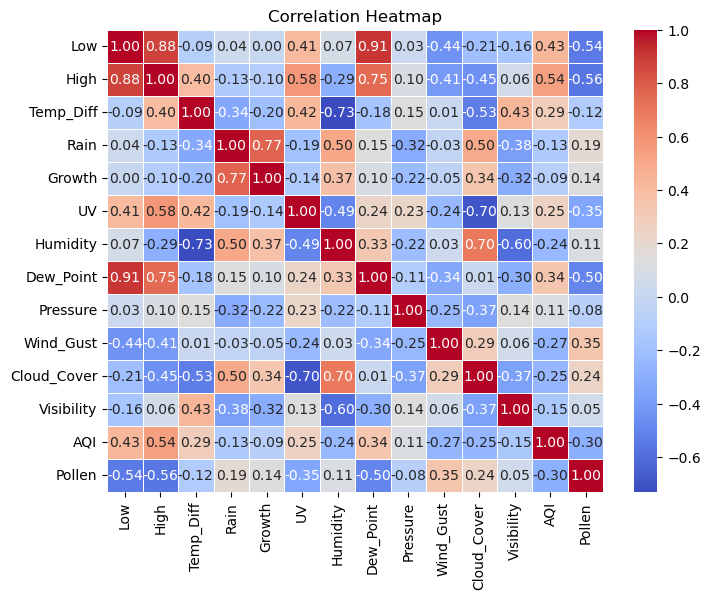

In [7]:
# Correlation Matrix
MTX = Land_Data.corr()
print("Correlation Matrix: ")
print(MTX)

# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(MTX, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()  # Call the show function with parentheses

In [9]:
# Simple Linear Regression Model
# Four most highly correlated models based off of matrix, specifically Growth

# Pulling the necessary data from the data set for analysis
predictor_variables = ['Rain', 'Humidity', 'Cloud_Cover', 'Visibility']
target_variable = 'Growth'

X = Land_Data[predictor_variables]
y = Land_Data[target_variable]

# Standard 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and fit the model
Growmod = LinearRegression()
Growmod.fit(X_train, y_train)

# Predicting off of test set
y_pred = Growmod.predict(X_test)

# Model evaluation
print("Model Coefficients: ", Growmod.coef_)
print("Intercept: ", Growmod.intercept_)

# Performance Metrics 
print("\nPerformance Metrics:")
print("- R² Score:", r2_score(y_test, y_pred))  
print("- MSE:", mean_squared_error(y_test, y_pred))

Model Coefficients:  [ 0.84677065  0.19112896 -0.40977993 -0.03446448]
Intercept:  0.49011992309842045

Performance Metrics:
- R² Score: 0.5406364249666117
- MSE: 0.8868988415280848


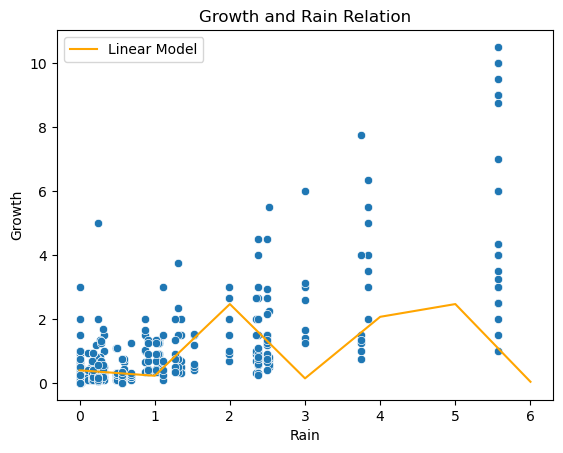

In [55]:
#Plotting model

#Scatterplot of Growth and Rain
sns.scatterplot(x='Rain', y='Growth', data=Land_Data)
plt.plot(y_pred[0:7], color = 'orange', label = 'Linear Model')
plt.title('Growth and Rain Relation')
plt.legend()
plt.show()

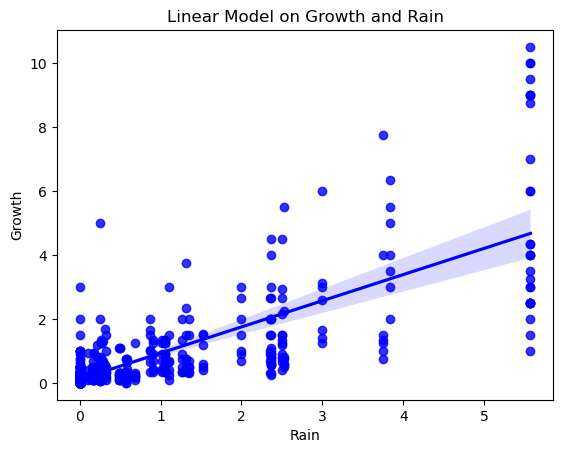

In [75]:
# Plot and create a simplar model

# Regression on only Rain
sns.regplot(x = 'Rain', y = 'Growth', data = Land_Data, dropna = True, color = 'blue')
plt.title('Linear Model on Growth and Rain')
plt.show()